$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge Nº3 | Práctica Calificada N°1}$$


_Nombre:_ _Willy Joel Valdivia Leon_

Descargamos la base de datos dada por el profesor


In [ ]:
!gdown 1djInzjQpRaLNbC78uKIOahnIw1qNN93A

Downloading...
From: https://drive.google.com/uc?id=1djInzjQpRaLNbC78uKIOahnIw1qNN93A
To: /content/qsar_aquatic_toxicity.csv
100% 22.9k/22.9k [00:00<00:00, 69.2MB/s]


Cargamos el archivo

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("qsar_aquatic_toxicity.csv",sep=";",header=None)

Se realiza la interpolación de los valores faltantes en el dataFrame para cada grupo de pacientes, rellenando los valores hacia atrás y hacia adelante, y se devuelve el resultado interpolado en un nuevo DataFrame


In [ ]:
df.columns=['TPSA(Tot)','SAacc','H-050','MLOGP','RDCHI','GATS1p','nN','C-040','LC50']

## Análisis exploratorio de datos (EDA)





In [ ]:
df

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TPSA(Tot)  546 non-null    float64
 1   SAacc      546 non-null    float64
 2   H-050      546 non-null    int64  
 3   MLOGP      546 non-null    float64
 4   RDCHI      546 non-null    float64
 5   GATS1p     546 non-null    float64
 6   nN         546 non-null    int64  
 7   C-040      546 non-null    int64  
 8   LC50       546 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


In [ ]:
df.describe()

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


Calculamos el numero de outliers de la data

In [ ]:
# calculo de zscore
z_scores = df.apply(lambda x: (x - x.mean()) / x.std())
outliers = (z_scores.abs() > 3).sum() # threshold = 3
outliers_cols = outliers[outliers > 0]

for col in outliers_cols.index:
    print(f"{col}: {outliers[col]}")

TPSA(Tot): 7
SAacc: 13
H-050: 9
MLOGP: 3
RDCHI: 6
GATS1p: 2
nN: 7
C-040: 6
LC50: 2


Vizualizamos los outliers en un boxplot

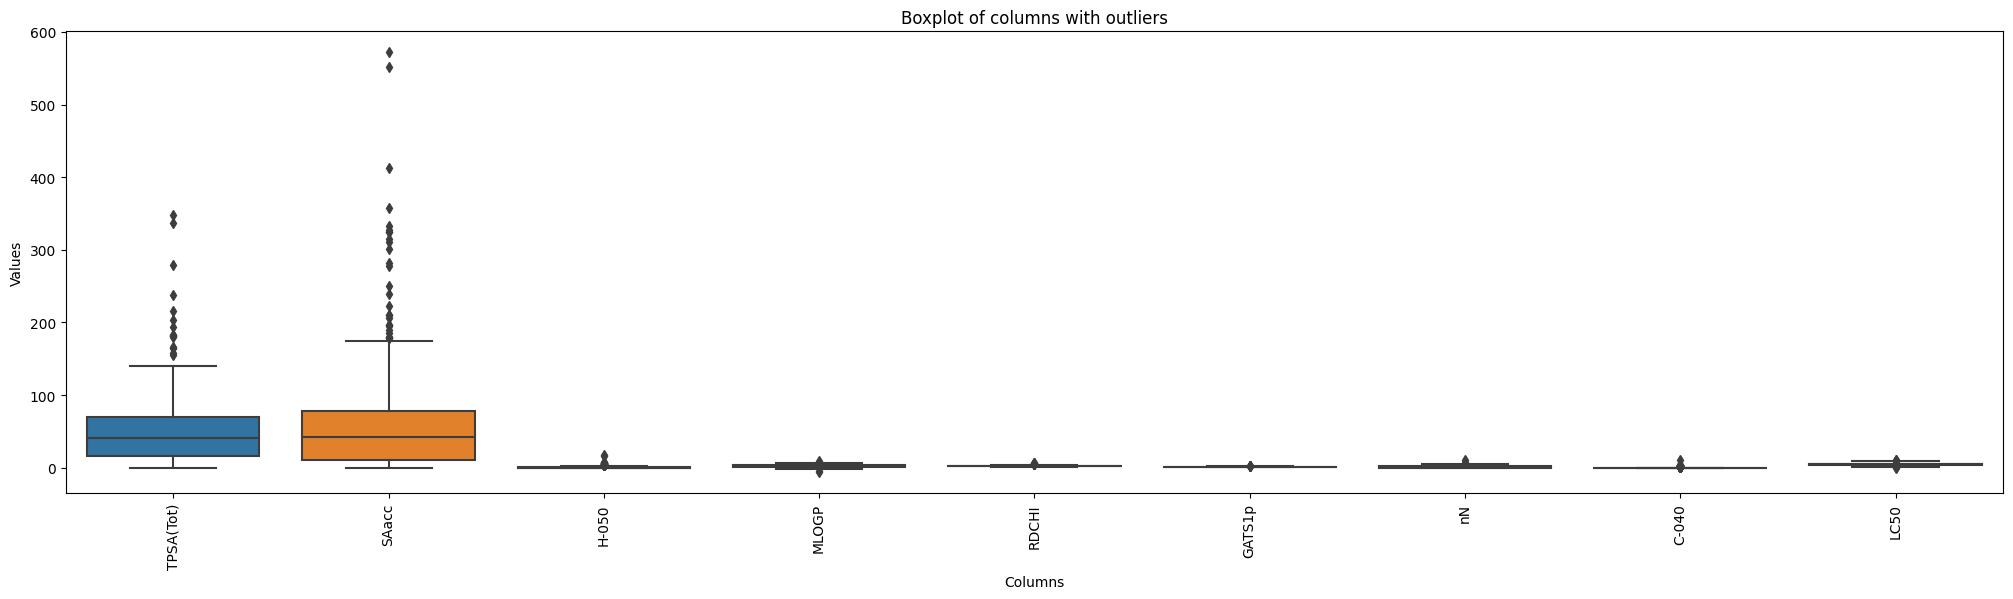

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

outliers_cols = outliers[outliers > 0].index.tolist()

df_outliers = df[outliers_cols]

fig, ax = plt.subplots(figsize=(25, 6))
sns.boxplot(data=df_outliers, ax=ax, orient='v')

ax.set_title("Boxplot of columns with outliers")
ax.set_xlabel("Columns")
ax.set_ylabel("Values")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

Observamos si hay valores nulos dentro de la data


In [ ]:
df.isnull().sum() 

TPSA(Tot)    0
SAacc        0
H-050        0
MLOGP        0
RDCHI        0
GATS1p       0
nN           0
C-040        0
LC50         0
dtype: int64

Observamos si hay valores Nan dentro de la data

In [ ]:
df.isna().sum()

TPSA(Tot)    0
SAacc        0
H-050        0
MLOGP        0
RDCHI        0
GATS1p       0
nN           0
C-040        0
LC50         0
dtype: int64

Ovservamos la relacion de las variables que tenemos

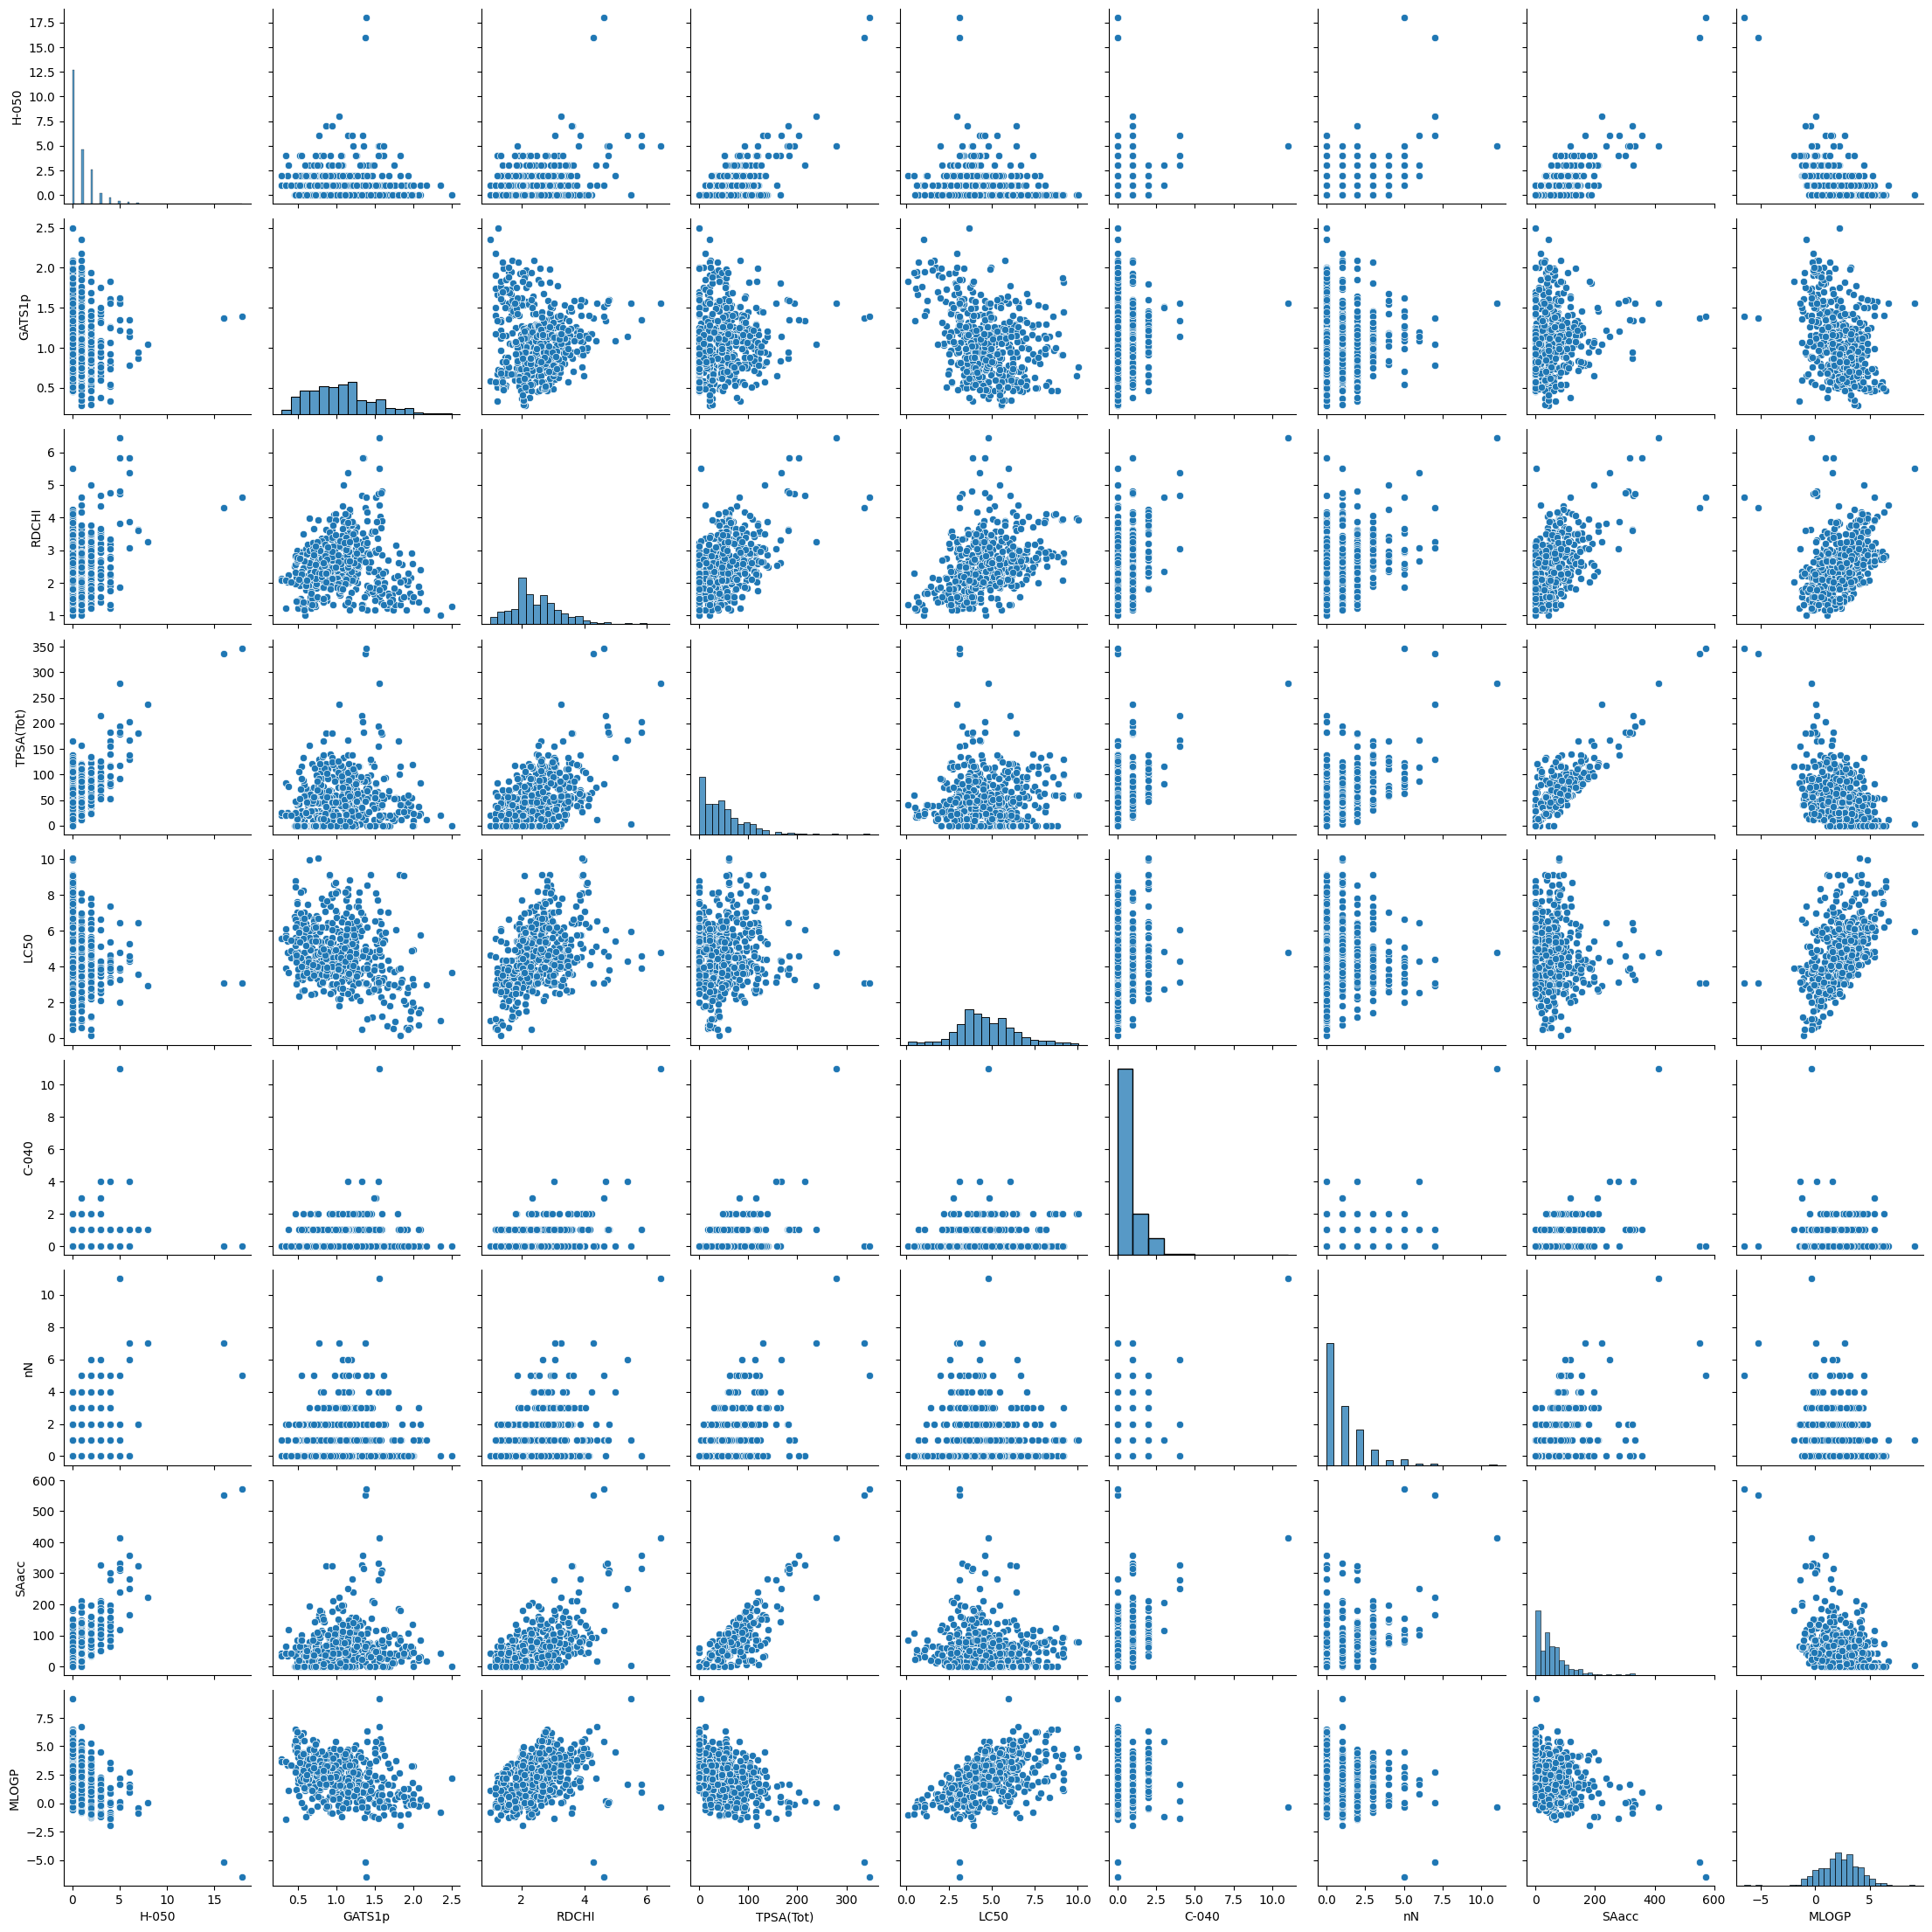

In [ ]:
random_features = np.random.choice(df.columns, 9, replace=False)
random_data = df[random_features]

sns.pairplot(random_data)
plt.show()

Elaboramos un histograma de las variables

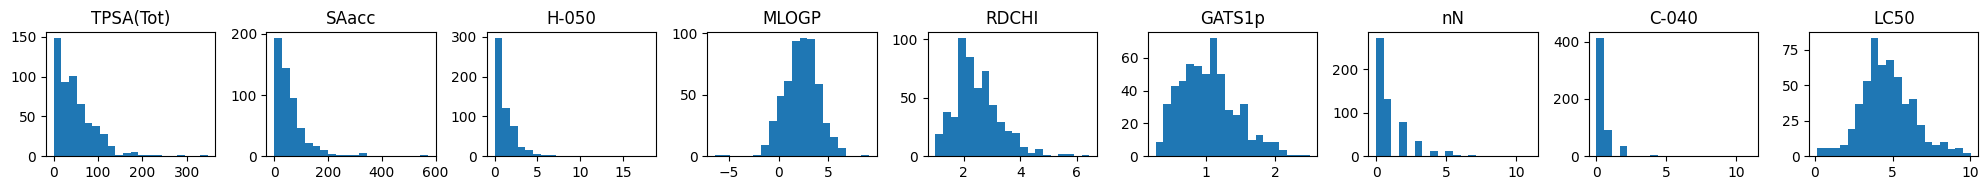

In [ ]:
fig, axs = plt.subplots(1, 9, figsize=(20, 2))
for i, col in enumerate(df.columns):
    axs[i].hist(df[col], bins=20)
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

## Preprocesamiento de datos

**Data standardization**

Como vimos la data presentaba outliers. Por lo que, es necesario aplicar un escalamiento de estos.

In [ ]:
X=df
X = X.drop('LC50', axis=1)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040
0,-0.746047,-0.641920,0.0,0.067353,-1.195513,-0.667611,-0.5,0.0
1,-0.746047,-0.641920,0.0,0.168730,-1.007479,-0.733711,-0.5,0.0
2,-0.575854,-0.476488,0.0,1.631987,0.626068,-1.009443,-0.5,0.0
3,-0.575854,-0.476488,0.0,1.471820,0.580128,-0.992446,-0.5,0.0
4,-0.575854,-0.476488,0.0,0.830691,0.442308,-0.614731,-0.5,0.0
...,...,...,...,...,...,...,...,...
541,-0.302402,-0.103876,2.0,0.487212,0.526709,-0.323890,0.5,0.0
542,-0.575854,-0.476488,0.0,0.463604,0.409188,-0.276676,-0.5,0.0
543,-0.746047,-0.641920,0.0,1.338502,0.819444,-0.544854,-0.5,0.0
544,-0.503757,-0.498942,0.0,0.271033,0.288462,-0.365439,-0.5,0.0


Vemos la data ya escalada

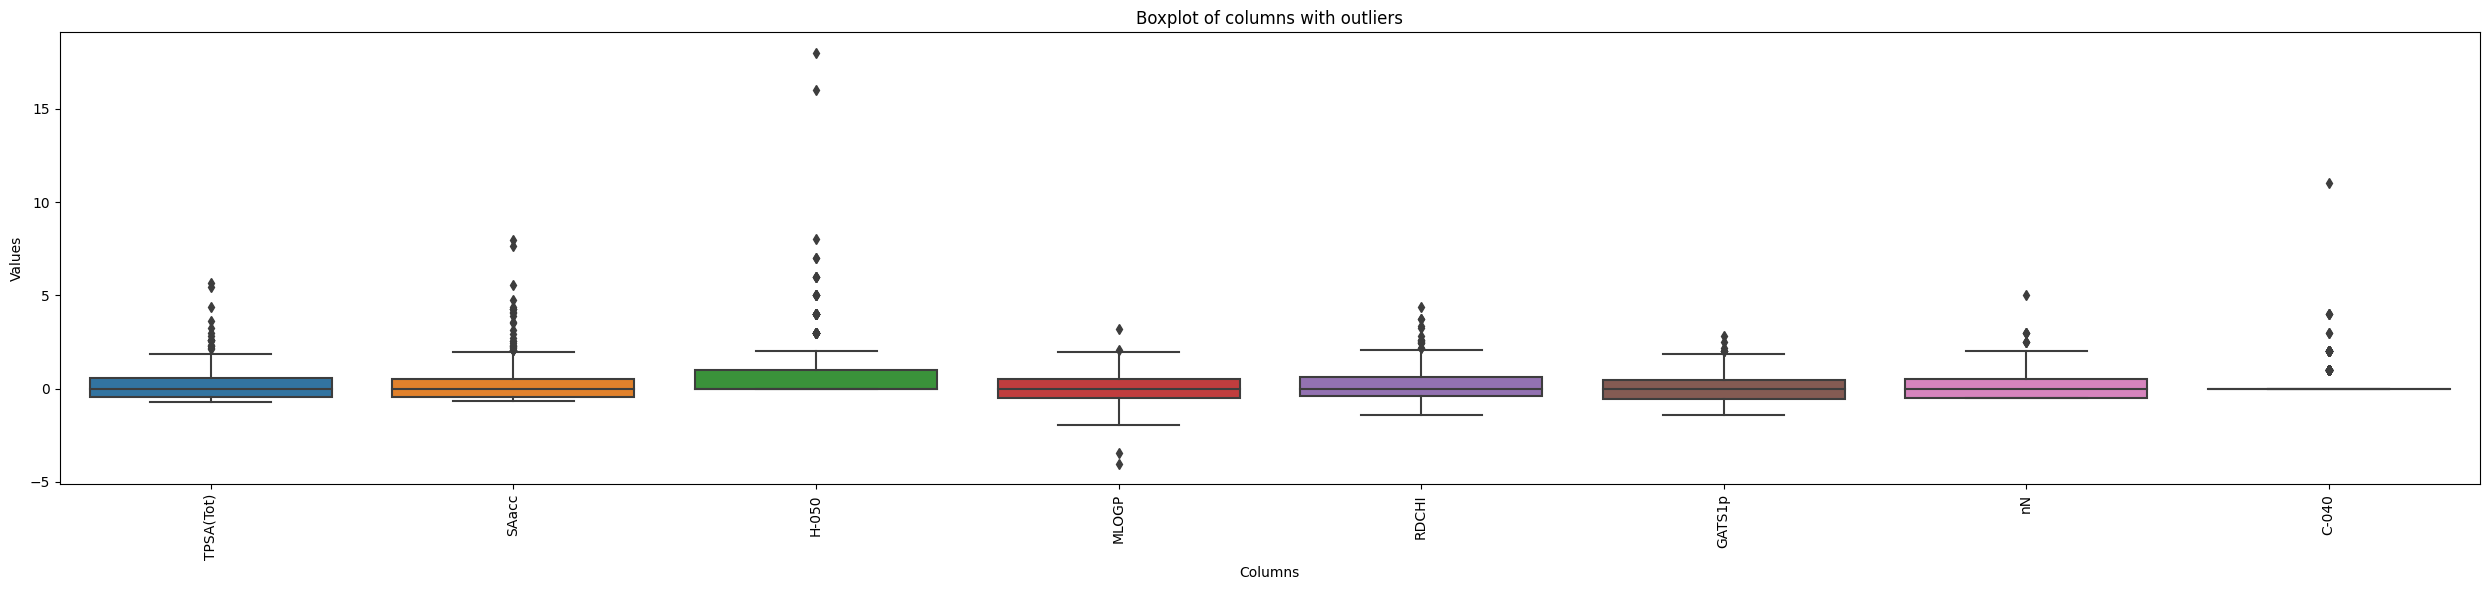

In [ ]:
import matplotlib.pyplot as plt

z_scores = X_scaled.apply(lambda x: (x - x.mean()) / x.std())
outliers = (z_scores.abs() > 3).sum() # threshold = 3
outliers_cols = outliers[outliers > 0]


outliers_cols = outliers[outliers > 0].index.tolist()

df_outliers = X_scaled[outliers_cols]

fig, ax = plt.subplots(figsize=(25, 6))
sns.boxplot(data=df_outliers, ax=ax, orient='v')

ax.set_title("Boxplot of columns with outliers")
ax.set_xlabel("Columns")
ax.set_ylabel("Values")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

**Feature selection**


Seleccionamos las variables mas importantes y relevantes

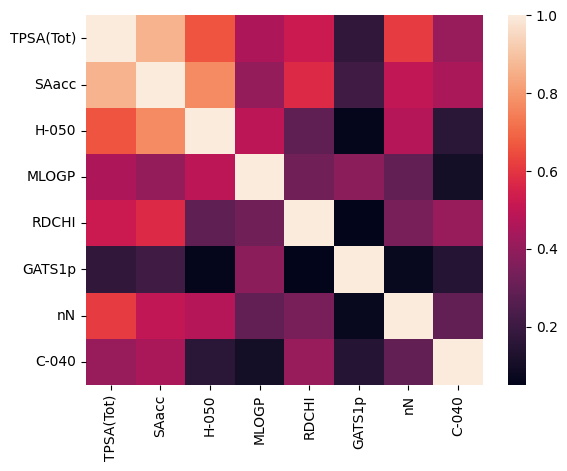

In [ ]:
# eliminamos features con ala colinealidad
corr_matrix = X_scaled.corr().abs()
sns.heatmap(corr_matrix)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# columnas con correlación mayor a un umbral 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

df1_sel  = X_scaled.drop(to_drop, axis=1)

In [ ]:
df1_sel.columns

Index(['TPSA(Tot)', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040'], dtype='object')

Como se observa no se elimina ninguna columna ya que se consideran todas como relevantes para la elaboracion del modelo.

## Establecimiento de la salida 


Segun lo revisado en la literatura, LC50 es una medida que define la toxicidad aguda del compuesto quimica, en este caso se define como la concentración que causa la muerte en el 50% de los organismos expuestos durante 48 horas de prueba). Mientras mas pequeño es el valor de  esta concentracion mas toxico sera para el organismo daphnia magna. Por lo cual, para la clasificacion, se crea una columna adicional en el dataframe, en dicha columna se toma el valor de 1 cuando el valor de LC50 es menor a un umbral especifico y 0 cuando este valor es mayor. El umbral que se decidio fue usar la mediana de la columna dada de LC50.

In [ ]:
umbral=df['LC50'].median()
print("El umbral definido es:")
print(umbral)
# Contar cuántos valores son inferiores el umbral en la columna "LC50"
print("El numero de compuestos quimicos toxicos es:")
count = (df['LC50'] < umbral).sum()
# Mostrar el resultado
print(count)

df['Pred_toxico'] = (df['LC50'] < umbral).astype(int)
df

El umbral definido es:
4.516
El numero de compuestos quimicos toxicos es:
273


,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50,Pred_toxico
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740,1
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330,1
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019,0
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723,0
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979,0
...,...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651,0
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953,1
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219,0
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995,0


In [ ]:
Y=df['Pred_toxico']

De esta manera, se define la salida para la elaboracion de nuestro modelo

## Optimización de hiperparámetros

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1)

Debido a que, en la literatura, se realizó estudios con k-nearest neighbors algorithm; con el cual, se obtuvo valores altos de predicción [1]. Por ello, se vió apropiado usar este modelo para la práctica actual.

In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# Definición del rango de parámetros
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# Ajuste del modelo para la búsqueda de cuadrícula
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [ ]:
print("Los mejores parametros para el modelo son: ")
print(grid_search.best_params_)

Los mejores parametros para el modelo son: 
{'n_neighbors': 7}


In [ ]:
accuracy = grid_search.best_score_ *100
print("La precisión de nuestro conjunto de datos de entrenamiento con GridSearchCv es: {:.2f}%".format(accuracy) )

La precisión de nuestro conjunto de datos de entrenamiento con GridSearchCv es: 79.39%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X_scaled, Y)

y_test_hat=knn.predict(x_test) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

print("Precisión para nuestro conjunto de datos de prueba con GridSearchCv es : {:.2f}%".format(test_accuracy) )

Precisión para nuestro conjunto de datos de prueba con GridSearchCv es : 80.91%


Se obtuvieron valores altos de prediccion al usar el modelo k-nearest neighbors algorithm y grid search. 

## Métricas de evaluación del modelo

Se calcularon las métricas oportunas para la evaluación del modelo

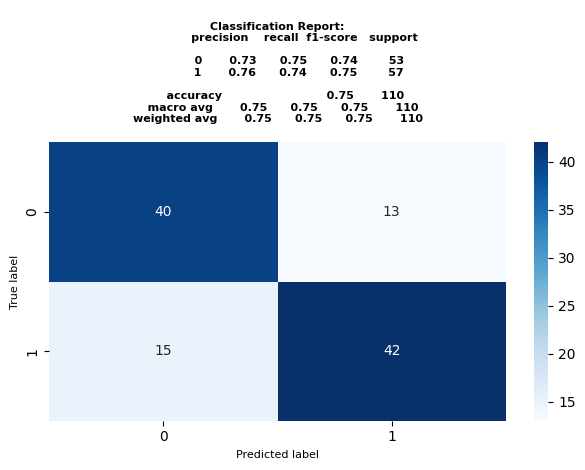

In [ ]:
# Predicciones
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# Classificacion report
cr = classification_report(y_test, y_pred)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
    
plt.title(f"\nClassification Report:\n{cr}",
              fontsize=8, fontweight='bold')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label',fontsize=8)
plt.ylabel('True label',fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
import pickle
model_file = "Model_prediction_QSAR_aquatic_toxicity.pkl"
with open(model_file, "wb") as file:
  pickle.dump(knn, file)

Referencias bibliográficas:

[1] M. Cassotti, D. Ballabio, V. Consonni, A. Mauri, I. V Tetko, and R. Todeschini, “Prediction of acute aquatic toxicity toward Daphnia magna by using the GA-kNN  method.,” Altern. Lab. Anim., vol. 42, no. 1, pp. 31–41, Mar. 2014, doi: 10.1177/026119291404200106.
